<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/explore_nbs/Explore_gpu_training_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A comparison of the GPU vs TPU training

This is the GPU version of the index notebook
of the fastai xla extensions index page

The only difference between the two is the
use of a GPU runtime

In [1]:
#hide
!pip install nbdev --upgrade > /dev/null

In [3]:
#hide
#colab
!curl -s https://course.fast.ai/setup/colab | bash 

Updating fastai...
Done.


Install fastai2 and the fastai_xla_extensions packages

In [4]:
#hide_output
!pip install fastai2 > /dev/null

### Import the libraries
Import the fastai2  libraries

In [5]:
from fastai2.vision.all import *

### Example
Build a Pets classifier -- adapted from fastai course [Lesson 5 notebook](https://github.com/fastai/course-v4/blob/master/nbs/05_pet_breeds.ipynb)

In [6]:
#hide
path = Path('.')

Load Oxford-IIT Pets dataset

In [7]:
#colab
path = untar_data(URLs.PETS)/'images'

In [8]:
Path.BASE_PATH = path

In [9]:
pat = r'(.+)_\d+.jpg$'

Create Fastai DataBlock


_Note that batch transforms are currently
set to none as they seem to slow the training
on the TPU (for investigation)._

In [10]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(pat),'name'),
    item_tfms=Resize(224),
    batch_tfms=[]
)

Get a TPU device

Set the dataloaders to use GPU

In [11]:
#colab
dls = datablock.dataloaders(path)

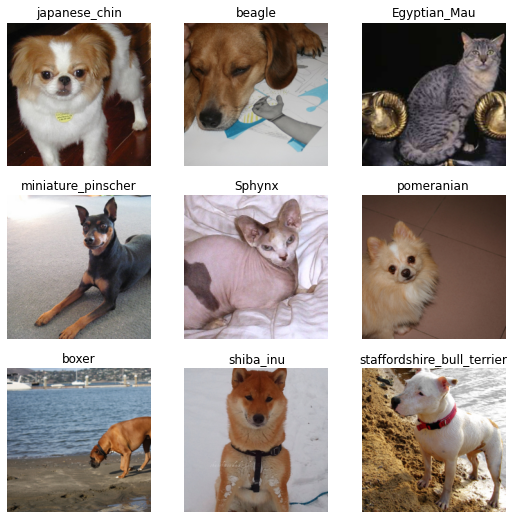

In [12]:
#colab
dls.show_batch()

Use the normal wrapper

In [13]:
opt_func = Adam

Create a Fastai CNN Learner

In [14]:
#colab
learner = cnn_learner(dls, resnet34, metrics=accuracy, opt_func=opt_func)
                      

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Using the `lr_find` works correctly. 

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0030199517495930195)

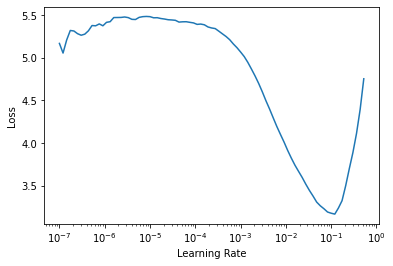

In [15]:
#colab
learner.lr_find()

Fine tune model

_Calling `learner.unfreeze` causes the model to overfit for the TPU so to make a fair comparison with the GPU version we are training using the frozen model only._

In [16]:
#colab
learner.freeze()

We are using the `lr` values same as the TPU (although these are not the ideal ones as shown by the LR Finder)

In [17]:
#colab
learner.fit_one_cycle(1,slice(7e-4),pct_start=0.99)

epoch,train_loss,valid_loss,accuracy,time
0,2.299198,0.453929,0.861976,01:04


The results show the GPU is running faster but running 1 epoch shows lower accuracy and higher loss values.

In [18]:
#colab
learner.save('stage-1')

In [19]:
#colab
learner.load('stage-1')

In [20]:
#hide
#colab
list(learner.model.parameters())[0].device

device(type='cuda', index=0)

The device used is a GPU ('cuda') not a TPU.

In [21]:
#colab
learner.freeze()

In [22]:
#colab
learner.fit_one_cycle(4,lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.817682,0.396767,0.887686,01:03
1,0.712634,0.344347,0.895805,01:03
2,0.636948,0.321876,0.898512,01:02
3,0.603956,0.322382,0.898512,01:02


It still reflects the general trend of the initial call to `fit_one_cycle` in that it runs 1 epoch per minute but at lower accuracy and higher losses. 

Plot loss seems to be working fine.

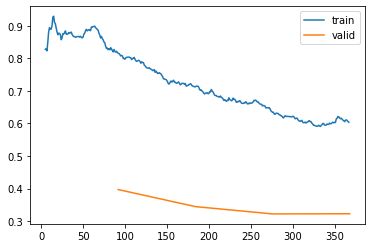

In [23]:
#colab
learner.recorder.plot_loss()

## Status
The fastai XLA extensions library is still in very early development phase (not even alpha) which means there's still a lot of things not working. 

Use it at your own risk.

If you wish to contribute to the project, fork it and make pull request. 

This project uses [nbdev](https://nbdev.fast.ai/) -- a jupyter notebook first development environment and is being developed on [Colab](https://colab.research.google.com).


In [ ]:
#hide
#colab
!nbdev_clean_nbs
!nbdev_build_docs

converting: /content/drive/My Drive/fastai_xla_extensions/nbs/00_core.ipynb
converting: /content/drive/My Drive/fastai_xla_extensions/nbs/index.ipynb
converting /content/drive/My Drive/fastai_xla_extensions/nbs/index.ipynb to README.md
